In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import sys
import re

sys.path.append(os.path.realpath('../src/data/'))
from sb_utils import save_file

## Contents

1.[Import Data](#import)


<a id='import'></a>
### Import Data
Import the raw data from `data > raw` and write it out to the `data > interim directory`. We'll work from the interim folder.

In [2]:
# the supplied CSV data file is the raw_data directory
aqi_df = pd.read_csv('../data/interim/aqi_yearly_1980_to_2021.csv')
aqi_df.sample(5)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
16949,Maine,Aroostook,2004,366,333,32,1,0,0,0,...,50,33,0,0,283,49,12,22,46.604100,-68.413500
31962,Texas,Kaufman,2019,365,320,45,0,0,0,0,...,52,39,0,1,288,0,76,0,32.731919,-96.317911
6504,Oregon,Deschutes,1991,213,141,72,0,0,0,0,...,64,43,158,0,0,0,0,55,44.054800,-121.294200
15445,Pennsylvania,Washington,2002,365,102,196,45,21,1,0,...,126,63,0,7,106,158,94,0,40.268963,-80.243995
14035,Georgia,Rockdale,2001,365,276,63,22,3,1,0,...,87,36,0,123,242,0,0,0,33.588545,-84.069608


In [25]:
# the supplied CSV data file is the raw_data directory
cdi_df = pd.read_csv('../data/interim/US_Chronic_Disease_Indicators_CDI.csv')
cdi_df.sample(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
3363,2015,2015,NJ,New Jersey,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,%,Crude Prevalence,22.5,22.5,Overall,Overall,POINT (-74.27369128799967 40.13057004800049),34,COPD,COPD3_0_1,CRDPREV,OVERALL,OVR
2696,2019,2019,IA,Iowa,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Crude Prevalence,6.1,6.1,Overall,Overall,POINT (-93.81649055599968 42.46940091300047),19,COPD,COPD2_0,CRDPREV,OVERALL,OVR
1638,2013,2013,MO,Missouri,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",Crude Rate,147.3,147.3,Overall,Overall,POINT (-92.56630005299968 38.635790776000476),29,COPD,COPD1_1,CRDRATE,OVERALL,OVR
1494,2010,2010,KS,Kansas,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",Crude Rate,236.5,236.5,Overall,Overall,POINT (-98.20078122699965 38.34774030000045),20,COPD,COPD1_2,CRDRATE,OVERALL,OVR
4249,2020,2020,SC,South Carolina,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,%,Crude Prevalence,36.2,36.2,Overall,Overall,POINT (-81.04537120699968 33.998821303000454),45,COPD,COPD3_0,CRDPREV,OVERALL,OVR


### Merge Data

Create a new dataframe that will be our working dataframe. We'll add features and observations to it throughout this notebook.

In [4]:
model_df = pd.DataFrame()

Build data profiles and tables
- Inferential statistics
Explore data relationships
- Data visualization
Feature Selection and Engineering
- If you have categorical features, you might need to one-hot encode them
- You may need to binarize your columns and bin your values.
- To handle missing data, think about how appropriate the methods of listwise deletion, data imputation, replacing missing values with constants or simply attempting to find the missing values are for your data.
- Think about whether you need to standardize, log-transform or normalize your data, as well as statistically valid ways to remove outliers.

Create hypotheses
    - Null and Alternative hypotheses

1. Are there variables that are particularly significant in terms of explaining the
answer to your project question?
2. Are there significant differences between subgroups in your data that may be
relevant to your project aim?
3. Are there strong correlations between pairs of independent variables or between
an independent and a dependent variable?
4. What are the most appropriate tests to use to analyze these relationships?


1. Form hypotheses/develop investigation themes to explore
2. Wrangle data
3. Assess the quality of data
4. Profile data
5. Explore each individual variable in the dataset
6. Assess the relationship between each variable and the target
7. Assess interactions between variables
8. Explore data across many dimensions
9. Feature Selection and Engineering

### Initial hypotheses/develop investigation themes to explore

The main question that I want to explore is whether the AQI rating (given as 90th percentile and median), or its categorization values ('Good Days', 'Moderate Days', 'Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days') its component measures can predict outcomes in CDC data on asmtha, lung cancers, or COPD. 

Right now, the geolocation data in cdi_df is encoded as 'POINT (-147.72205903599973 64.84507995700051)'. In order to plot this, we'll need to break it into longitude and latitude data.

In [5]:
# split the GeoLocation column into longitude and latitude cols
cdi_df[['Longitude','Latitude']] = cdi_df.GeoLocation.str.extract('^POINT+\s\((\-?\d+\.\d+)\s(\-?\d+\.\d+)\)$', expand=False)
cdi_df.loc[:,'Longitude'] = cdi_df.loc[:,'Longitude'].astype('float')
cdi_df.loc[:,'Latitude'] = cdi_df.loc[:,'Latitude'].astype('float')
# and drop GeoLocation column
cdi_df.drop(['GeoLocation'], axis=1, inplace=True)

cdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  4284 non-null   int64  
 1   YearEnd                    4284 non-null   int64  
 2   LocationAbbr               4284 non-null   object 
 3   LocationDesc               4284 non-null   object 
 4   DataSource                 4284 non-null   object 
 5   Topic                      4284 non-null   object 
 6   Question                   4284 non-null   object 
 7   DataValueUnit              4284 non-null   object 
 8   DataValueType              4284 non-null   object 
 9   DataValue                  4272 non-null   float64
 10  DataValueAlt               4272 non-null   float64
 11  StratificationCategory1    4284 non-null   object 
 12  Stratification1            4284 non-null   object 
 13  LocationID                 4284 non-null   int64

To get an overview of the data in a geospacial sense, lets plot each of our topics by Question. We'll define a function to make plotting easier:

In [6]:
def geo_plot_topic_by_question(data=None, topic=None, question=None, title=None):
    assert ~data.empty, "you must provide a dataframe"
    assert topic, "you must provide a topic"
    assert question, "you must provide a question"
    temp = data[(data['Topic'] == topic) & (data['Question'] == question)]
    temp = pd.melt(data,
                        id_vars=['LocationDesc','YearStart','Longitude','Latitude'], 
                        var_name='Measures', 
                        value_vars=['DataValueAlt'],
                        value_name='Target')
    # confine the plot to continental US
    temp.drop(temp[temp['Longitude'] < -125].index, inplace=True)

    # now plot
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x=temp['Longitude'],y=temp['Latitude'], alpha=0.3, hue=temp['YearStart'], size=temp.Target).set(title=title)
    plt.legend(loc='lower right');

Plot asmtha prevalence

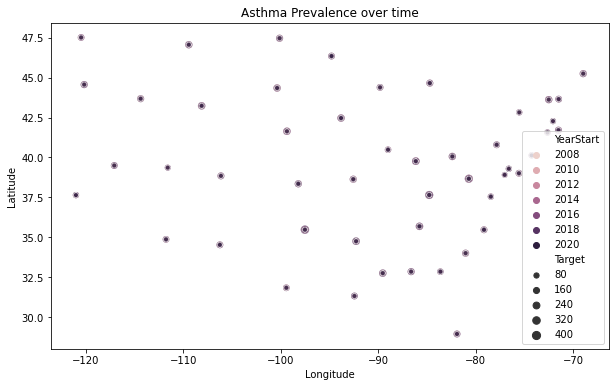

In [7]:
geo_plot_topic_by_question(data=cdi_df,
                           topic='Asthma',
                           question='Current asthma prevalence among adults aged >= 18 years',
                           title = "Asthma Prevalence over time")

There are two questions associated with the cancer topic

In [8]:
cdi_df[cdi_df['Topic'] == 'Cancer'].Question.unique()

array(['Cancer of the lung and bronchus, incidence',
       'Cancer of the lung and bronchus, mortality'], dtype=object)

Plot lung cancer incidence

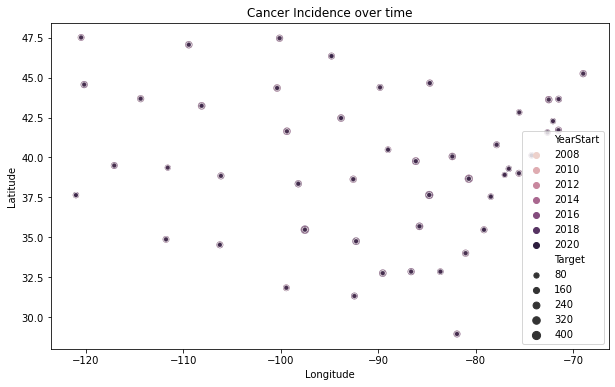

In [9]:
geo_plot_topic_by_question(data=cdi_df,
                           topic='Cancer',
                           question='Cancer of the lung and bronchus, incidence',
                           title = "Cancer Incidence over time")

Plot Cancer mortality

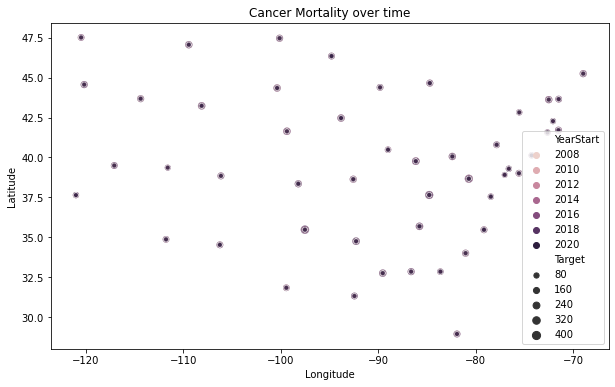

In [10]:
geo_plot_topic_by_question(data=cdi_df,
                           topic='Cancer',
                           question='Cancer of the lung and bronchus, mortality',
                           title = "Cancer Mortality over time")

If nothing else, these give us a sense of the geographic locations of the measures. But its difficult to evaluate how these values change over time. For that, lets plot each topic/question as a bar graph.

In [11]:
def bar_plot_topic_by_question(data=None, topic=None, question=None, title=None):
    assert ~data.empty, "you must provide a dataframe"
    assert topic, "you must provide a topic"
    assert question, "you must provide a question"
    temp = data[(data['Topic'] == topic) & (data['Question'] == question)]
    temp = temp.melt(id_vars=['YearStart','YearEnd','LocationAbbr'], 
                      value_vars=['DataValueAlt']).sort_values(by=['YearStart','LocationAbbr'])
    t = title or question
    locations = temp.LocationAbbr.unique()
    # plot
    try:
        g = sns.catplot(x="YearStart", y="value",
                        hue="YearStart", col="LocationAbbr",
                        data=temp, kind="bar", col_wrap=2,
                        height=2, aspect=2.7,sharex=False, sharey=False)
        g.fig.suptitle(t, y=1.0)
        g.fig.subplots_adjust(top=0.99, hspace=0.4)
        
        for i,ax in enumerate(g.axes.flat):
            # set value label on each bar
            for container in ax.containers:
                ax.bar_label(container)
            # set location on each subplot
            ax.set_title('State={}'.format(locations[i]))
 
    except KeyError as err:
        print()


Plot for Asthma

In [12]:
cdi_df[cdi_df.Topic == 'Asthma'].Question.unique()

array(['Current asthma prevalence among adults aged >= 18 years'],
      dtype=object)

In [13]:
# bar_plot_topic_by_question(cdi_df,
#                            'Asthma',
#                            'Current asthma prevalence among adults aged >= 18 years',
#                            'Asthma aged >= 18 years (% of population)'
#                           )

Plot for cancer incidence and mortality

In [14]:
cdi_df[cdi_df.Topic == 'Cancer'].Question.unique()

array(['Cancer of the lung and bronchus, incidence',
       'Cancer of the lung and bronchus, mortality'], dtype=object)

In [15]:
# bar_plot_topic_by_question(cdi_df,
#                            'Cancer',
#                            'Cancer of the lung and bronchus, incidence',
#                            'Cancer of the lung and bronchus, incidence (per 100K)',
#                           )

In [16]:
# bar_plot_topic_by_question(cdi_df,
#                            'Cancer',
#                            'Cancer of the lung and bronchus, mortality',
#                            'Cancer of the lung and bronchus, mortality (per 100K)'
#                           )

Plot Chronic Obstructive Pulmonary Disease (COPD) questions

In [17]:
cdi_df[cdi_df.Topic == 'Chronic Obstructive Pulmonary Disease'].Question.unique()

array(['Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years',
       'Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years',
       'Prevalence of current smoking among adults >= 18 with diagnosed chronic obstructive pulmonary disease',
       'Prevalence of current smoking among adults >= 45 years with diagnosed chronic obstructive pulmonary disease',
       'Prevalence of chronic obstructive pulmonary disease among adults >= 18',
       'Prevalence of chronic obstructive pulmonary disease among adults >= 45 years'],
      dtype=object)

In [18]:
# bar_plot_topic_by_question(cdi_df,
#                            'Chronic Obstructive Pulmonary Disease',
#                            'Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years',
#                            'COPD mortality aged >= 45 years (per 100K)'
#                           )

In [19]:
# bar_plot_topic_by_question(cdi_df,
#                            'Chronic Obstructive Pulmonary Disease',
#                            'Prevalence of chronic obstructive pulmonary disease among adults >= 45 years',
#                            'COPD prevalence aged >= 45 years (% of population)'
#                           )

Lets normalize the day measures by the number of day in which measures were taken ('Days AQI')

In [20]:
aqi_df_norm = aqi_df.copy()
# Good Days, Moderate Days, Unhealthy for Sensitive Groups Days, Unhealthy Days, Very Unhealthy Days, Hazardous Days
aqi_df_norm.iloc[:,4:10] = aqi_df_norm.iloc[:,4:10].apply(lambda x: x/aqi_df.iloc[:,3], axis=0)
# Days CO, Days NO2, Days Ozone, Days SO2, Days PM2.5, Days PM10
aqi_df_norm.iloc[:,13:19] = aqi_df_norm.iloc[:,13:19].apply(lambda x: x/aqi_df.iloc[:,3], axis=0)
aqi_df_norm.sample(10)


,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
26352,Georgia,Glynn,2014,332,0.864458,0.135542,0.000000,0.000000,0.000000,0.0,...,54,37,0.000000,0.000000,0.433735,0.000000,0.566265,0.000000,31.169805,-81.495035
7102,New Hampshire,Hillsborough,1992,366,0.729508,0.234973,0.021858,0.013661,0.000000,0.0,...,77,39,0.139344,0.062842,0.426230,0.371585,0.000000,0.000000,42.861830,-71.878626
7403,West Virginia,Ohio,1992,366,0.420765,0.349727,0.213115,0.016393,0.000000,0.0,...,118,57,0.032787,0.000000,0.316940,0.644809,0.000000,0.005464,40.114876,-80.700972
9772,California,Calaveras,1996,356,0.620787,0.191011,0.137640,0.044944,0.005618,0.0,...,129,42,0.005618,0.000000,0.985955,0.000000,0.000000,0.008427,38.201850,-120.680277
31864,Pennsylvania,Greene,2019,349,0.942693,0.057307,0.000000,0.000000,0.000000,0.0,...,48,35,0.000000,0.000000,0.736390,0.000000,0.263610,0.000000,39.809330,-80.265670
18265,South Carolina,Lexington,2005,365,0.550685,0.408219,0.041096,0.000000,0.000000,0.0,...,81,46,0.000000,0.000000,0.000000,0.230137,0.216438,0.553425,33.969145,-81.066290
28547,Minnesota,Carlton,2016,364,0.947802,0.049451,0.002747,0.000000,0.000000,0.0,...,42,29,0.000000,0.000000,0.703297,0.000000,0.296703,0.000000,46.713694,-92.511722
20965,North Carolina,Lincoln,2008,214,0.588785,0.345794,0.051402,0.014019,0.000000,0.0,...,93,47,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,35.438556,-81.276750
23019,Pennsylvania,Mercer,2010,365,0.575342,0.391781,0.032877,0.000000,0.000000,0.0,...,77,47,0.000000,0.000000,0.673973,0.000000,0.326027,0.000000,41.427100,-80.145100
13328,Massachusetts,Suffolk,2000,366,0.314208,0.653005,0.032787,0.000000,0.000000,0.0,...,81,58,0.000000,0.147541,0.081967,0.142077,0.622951,0.005464,42.325186,-71.056061


Lets test the normalized data by overlaying it on the raw data. 

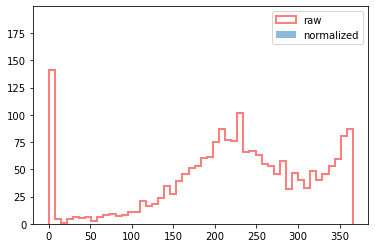

In [21]:
#temp = aqi_df[aqi_df['State'] == 'California']['Days Ozone'] / aqi_df[aqi_df['State'] == 'California']['Days with AQI']
temp = aqi_df[aqi_df['State'] == 'California']['Days Ozone']
temp_norm = aqi_df_norm[aqi_df['State'] == 'California']['Days Ozone']

plt.hist(temp, histtype='step', bins=50, color='red', alpha=0.5, label='raw', linewidth=2)
plt.hist(temp_norm, bins=50, alpha=0.5, label='normalized', linewidth=2)
plt.legend(loc='upper right')
plt.show();

### Correlations

AQI data correlations

In [ ]:
corrmat = aqi_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# plot
f, ax = plt.subplots(figsize=(12, 9))
_ = sns.heatmap(round(corrmat,2), annot=True, mask=mask, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93);

CDI data correlations

Lets convert the Topic and Question categorical columns into one-hot encoded columns for correlation.

In [63]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# perform one-hot encoding on 'Topic' column 
encoder_df = pd.DataFrame(encoder.fit_transform(cdi_df[['Topic']]).toarray())
# rename
encoder_df.columns = encoder.categories_[0]
# merge one-hot encoded columns back with original DataFrame
cdi_df = pd.concat([cdi_df, encoder_df], axis=1)

# do the same for 'Question' column
encoder_df = pd.DataFrame(encoder.fit_transform(cdi_df[['Question']]).toarray())
encoder_df.columns = encoder.categories_[0]
cdi_df = pd.concat([cdi_df, encoder_df], axis=1)

# # do the same for 'LocationAbbr' column
# encoder_df = pd.DataFrame(encoder.fit_transform(cdi_df[['LocationAbbr']]).toarray())
# encoder_df.columns = encoder.categories_[0]
# cdi_df = pd.concat([cdi_df, encoder_df], axis=1)

# drop columns that have been encoded
cdi_df.drop(['LocationAbbr','LocationDesc','DataSource','DataValueUnit','DataValueType','Topic','Question','DataValue','StratificationCategory1','Stratification1','TopicID','QuestionID','DataValueTypeID','StratificationCategoryID1','StratificationID1'], axis=1, inplace=True)
# TEMP
cdi_df.drop(['GeoLocation'], axis=1, inplace=True)

#view final df
cdi_df.head(1)

,YearStart,YearEnd,DataValueAlt,LocationID,Asthma,Cancer,Chronic Obstructive Pulmonary Disease,"Cancer of the lung and bronchus, incidence","Cancer of the lung and bronchus, mortality",Current asthma prevalence among adults aged >= 18 years,Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years,Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years,Prevalence of chronic obstructive pulmonary disease among adults >= 18,Prevalence of chronic obstructive pulmonary disease among adults >= 45 years,Prevalence of current smoking among adults >= 18 with diagnosed chronic obstructive pulmonary disease,Prevalence of current smoking among adults >= 45 years with diagnosed chronic obstructive pulmonary disease
0,2013,2013,9.3,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


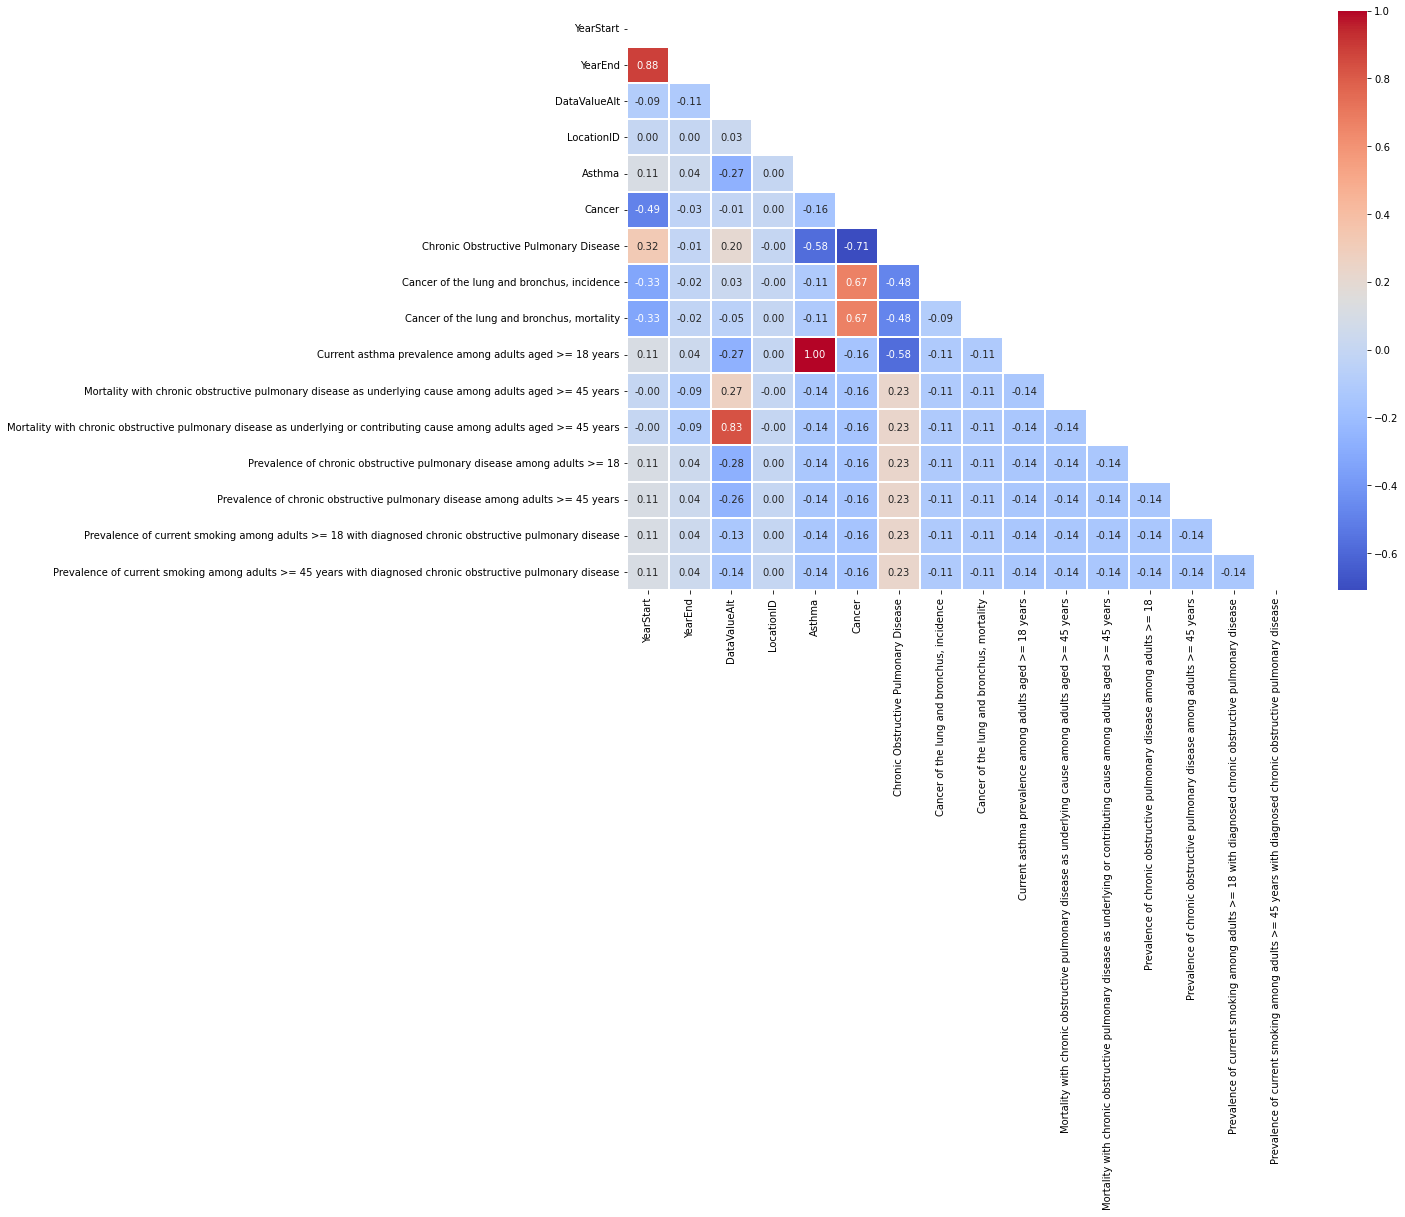

In [65]:
corrmat = cdi_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# plot
f, ax = plt.subplots(figsize=(15, 10))
_ = sns.heatmap(round(corrmat,2), annot=True, mask=mask, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93);

Standardize and plot again

In [66]:
from sklearn.pipeline import Pipeline
from sklearn import impute
from sklearn import preprocessing

num_pipeline = Pipeline([
    ('imputer', impute.SimpleImputer(strategy='median')),
    #('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', preprocessing.StandardScaler())
])
#cdi_df_standard = num_pipeline.fit_transform(cdi_df)
cdi_df[cdi_df.columns] = num_pipeline.fit_transform(cdi_df)
cdi_df

,YearStart,YearEnd,DataValueAlt,LocationID,Asthma,Cancer,Chronic Obstructive Pulmonary Disease,"Cancer of the lung and bronchus, incidence","Cancer of the lung and bronchus, mortality",Current asthma prevalence among adults aged >= 18 years,Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years,Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years,Prevalence of chronic obstructive pulmonary disease among adults >= 18,Prevalence of chronic obstructive pulmonary disease among adults >= 45 years,Prevalence of current smoking among adults >= 18 with diagnosed chronic obstructive pulmonary disease,Prevalence of current smoking among adults >= 45 years with diagnosed chronic obstructive pulmonary disease
0,-0.473897,-0.784181,-0.723388,-1.719785,2.720294,-0.447214,-1.581139,-0.301511,-0.301511,2.720294,-0.367607,-0.367607,-0.367607,-0.367607,-0.367607,-0.367607
1,0.152990,-0.064277,-0.724713,-1.719785,2.720294,-0.447214,-1.581139,-0.301511,-0.301511,2.720294,-0.367607,-0.367607,-0.367607,-0.367607,-0.367607,-0.367607
2,-1.100785,-1.504085,-0.737970,-1.719785,2.720294,-0.447214,-1.581139,-0.301511,-0.301511,2.720294,-0.367607,-0.367607,-0.367607,-0.367607,-0.367607,-0.367607
3,1.093322,1.015579,-0.724713,-1.719785,2.720294,-0.447214,-1.581139,-0.301511,-0.301511,2.720294,-0.367607,-0.367607,-0.367607,-0.367607,-0.367607,-0.367607
4,-0.787341,-1.144133,-0.727365,-1.719785,2.720294,-0.447214,-1.581139,-0.301511,-0.301511,2.720294,-0.367607,-0.367607,-0.367607,-0.367607,-0.367607,-0.367607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,1.720209,1.735482,-0.593472,1.597211,-0.367607,-0.447214,0.632456,-0.301511,-0.301511,-0.367607,-0.367607,-0.367607,-0.367607,2.720294,-0.367607,-0.367607
4280,1.720209,1.735482,-0.276638,1.597211,-0.367607,-0.447214,0.632456,-0.301511,-0.301511,-0.367607,-0.367607,-0.367607,-0.367607,-0.367607,-0.367607,2.720294
4281,1.720209,1.735482,-0.437043,1.533423,-0.367607,-0.447214,0.632456,-0.301511,-0.301511,-0.367607,-0.367607,-0.367607,-0.367607,-0.367607,2.720294,-0.367607
4282,1.720209,1.735482,-0.768460,1.342058,-0.367607,-0.447214,0.632456,-0.301511,-0.301511,-0.367607,-0.367607,-0.367607,2.720294,-0.367607,-0.367607,-0.367607


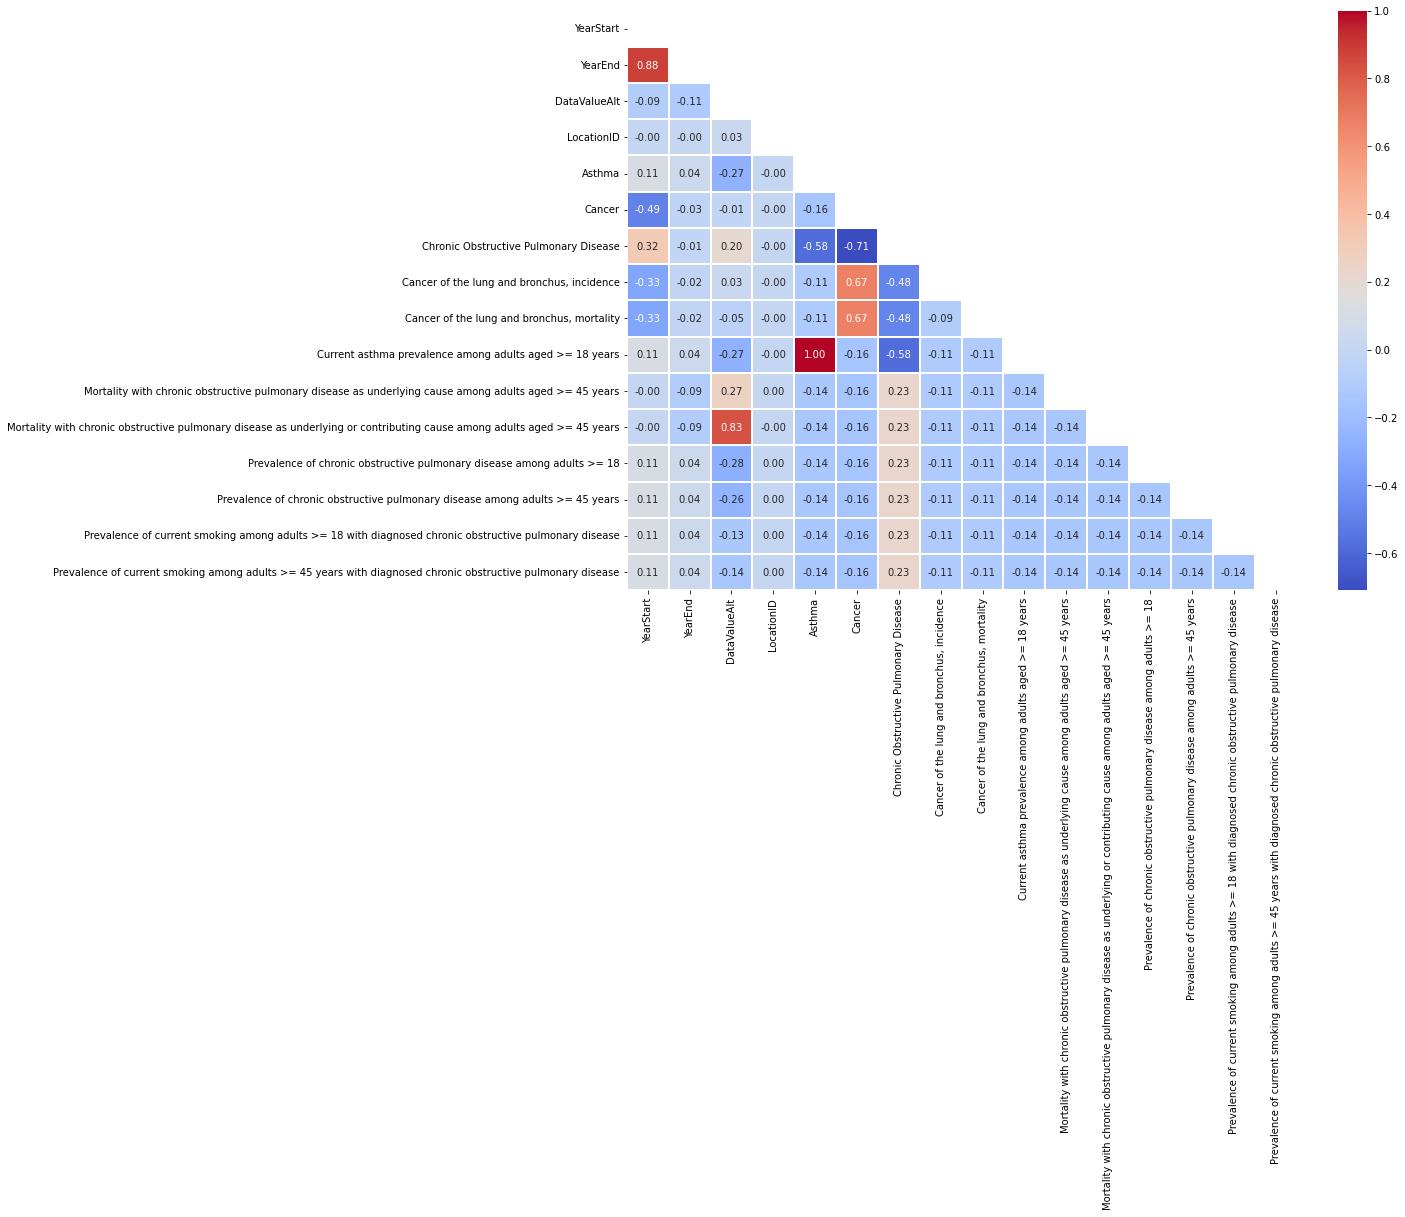

In [68]:
corrmat = cdi_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# plot
f, ax = plt.subplots(figsize=(15, 10))
_ = sns.heatmap(round(corrmat,2), annot=True, mask=mask, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93);

In [100]:
aqi_df.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
0,Alabama,Jefferson,1980,343,171,109,37,19,7,0,...,140,51,207,0,136,0,0,0,33.565278,-86.796389
1,Alabama,Madison,1980,344,154,125,60,5,0,0,...,112,56,28,168,148,0,0,0,34.772727,-86.756174
2,Alabama,Mobile,1980,286,180,62,35,8,1,0,...,119,41,0,0,68,218,0,0,30.474305,-88.141022
3,Alabama,Morgan,1980,332,207,93,32,0,0,0,...,100,39,0,121,28,183,0,0,34.530717,-86.967536
4,Alabama,Tuscaloosa,1980,132,94,28,10,0,0,0,...,93,38,0,0,132,0,0,0,33.089772,-87.459733


In [102]:
#aqi_by_state = aqi_df.groupby('State').mean()
aqi_by_state = aqi_df.groupby(['State', 'Year'])[['Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10']].mean()
aqi_by_state.head(5)

Days with AQI   Good Days  Moderate Days  \
State   Year                                             
Alabama 1980     287.400000  161.200000      83.400000   
        1981     299.833333  169.000000      79.166667   
        1982     285.500000  173.166667      77.833333   
        1983     256.600000  151.400000      68.800000   
        1984     299.750000  193.000000      73.750000   

              Unhealthy for Sensitive Groups Days  Unhealthy Days  \
State   Year                                                        
Alabama 1980                            34.800000        6.400000   
        1981                            38.166667       11.166667   
        1982                            28.000000        5.833333   
        1983                            28.200000        6.400000   
        1984                            27.250000        5.500000   

              Very Unhealthy Days  Hazardous Days  Max AQI  \
State   Year                                                 
Alabama 1980             1.600000             0.0    181.0   
        1981             2.333333             0.0    180.0   
        1982             0.666667             0.0    181.0   
        1983             1.800000             0.0    197.4   
        1984             0.250000             0.0    169.0   

              90th Percentile AQI  Median AQI    Days CO   Days NO2  \
State   Year                                                          
Alabama 1980           112.800000   45.000000  47.000000  57.800000   
        1981           115.000000   50.833333  12.000000  14.666667   
        1982           103.833333   44.833333  13.333333   4.333333   
        1983           100.600000   43.000000  26.800000   0.000000   
        1984            95.250000   38.250000  43.500000   0.000000   

              Days Ozone  Days SO2  Days PM2.5  Days PM10  
State   Year                                               
Alabama 1980  102.400000      80.2         0.0        0.0  
        1981  236.166667      37.0         0.0        0.0  
        1982  241.333333      26.5         0.0        0.0  
        1983  179.600000      50.2         0.0        0.0  
        1984  164.250000      92.0         0.0        0.0

In [215]:
cdi_df = pd.read_csv('../data/interim/US_Chronic_Disease_Indicators_CDI.csv')

In [216]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# perform one-hot encoding on 'Topic' column 
encoder_df = pd.DataFrame(encoder.fit_transform(cdi_df[['Topic']]).toarray())
# rename
encoder_df.columns = encoder.categories_[0]
# merge one-hot encoded columns back with original DataFrame
cdi_df = pd.concat([cdi_df, encoder_df], axis=1)

# do the same for 'Question' column
encoder_df = pd.DataFrame(encoder.fit_transform(cdi_df[['Question']]).toarray())
encoder_df.columns = encoder.categories_[0]
cdi_df = pd.concat([cdi_df, encoder_df], axis=1)

# do the same for 'LocationAbbr' column
# encoder_df = pd.DataFrame(encoder.fit_transform(cdi_df[['LocationAbbr']]).toarray())
# encoder_df.columns = encoder.categories_[0]
# cdi_df = pd.concat([cdi_df, encoder_df], axis=1)

# drop columns that have been encoded
cdi_df.drop(['LocationAbbr','DataSource','DataValueUnit','DataValueType','Topic','Question','DataValue','StratificationCategory1','Stratification1','TopicID','QuestionID','DataValueTypeID','StratificationCategoryID1','StratificationID1'], axis=1, inplace=True)
# TEMP
cdi_df.drop(['GeoLocation'], axis=1, inplace=True)

#view final df
cdi_df.head(1)

,YearStart,YearEnd,LocationDesc,DataValueAlt,LocationID,Asthma,Cancer,Chronic Obstructive Pulmonary Disease,"Cancer of the lung and bronchus, incidence","Cancer of the lung and bronchus, mortality",Current asthma prevalence among adults aged >= 18 years,Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years,Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years,Prevalence of chronic obstructive pulmonary disease among adults >= 18,Prevalence of chronic obstructive pulmonary disease among adults >= 45 years,Prevalence of current smoking among adults >= 18 with diagnosed chronic obstructive pulmonary disease,Prevalence of current smoking among adults >= 45 years with diagnosed chronic obstructive pulmonary disease
0,2013,2013,Alaska,9.3,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
#cdi_df = cdi_df.drop(['LocationAbbr','DataSource','DataValueUnit','DataValueType','Topic','Question','DataValue','StratificationCategory1','Stratification1','TopicID','QuestionID','DataValueTypeID','StratificationCategoryID1','StratificationID1','GeoLocation'], axis=1, inplace=True)
#cdi_df = cdi_df.drop(['LocationAbbr','DataSource','DataValueUnit','DataValueType','Topic','Question','DataValue','StratificationCategory1','Stratification1','TopicID','QuestionID','DataValueTypeID','StratificationCategoryID1','StratificationID1','GeoLocation'], axis=1, inplace=True)

merged_df = aqi_by_state.merge(cdi_df, left_on=['State','Year'], right_on=['LocationDesc','YearStart'], how='left')
merged_df.columns

Index(['Days with AQI', 'Good Days', 'Moderate Days',
       'Unhealthy for Sensitive Groups Days', 'Unhealthy Days',
       'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10', 'YearStart',
       'YearEnd', 'LocationDesc', 'DataValueAlt', 'LocationID', 'Asthma',
       'Cancer', 'Chronic Obstructive Pulmonary Disease',
       'Cancer of the lung and bronchus, incidence',
       'Cancer of the lung and bronchus, mortality',
       'Current asthma prevalence among adults aged >= 18 years',
       'Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years',
       'Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years',
       'Prevalence of chronic obstructive pulmonary disease among adults >= 18',
       'Prevalence of chronic obstructive pulmonary dise

In [218]:
merged_df = merged_df.rename({
    'Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years': 'COPD mortality age >= 45', 
    'Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years':'COPD contributing mortality age >= 45',
    'Prevalence of chronic obstructive pulmonary disease among adults >= 18':'COPD prevalence among adults >= 18',
    'Prevalence of chronic obstructive pulmonary disease among adults >= 45 years':'COPD prevalence among adults >= 45',
    'Prevalence of current smoking among adults >= 18 with diagnosed chronic obstructive pulmonary disease':'smoking and COPD prevalence among adults >= 18',
    'Prevalence of current smoking among adults >= 45 years with diagnosed chronic obstructive pulmonary disease':'smoking and COPD prevalence among adults >= 45'
    }, axis='columns')
merged_df.columns

Index(['Days with AQI', 'Good Days', 'Moderate Days',
       'Unhealthy for Sensitive Groups Days', 'Unhealthy Days',
       'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10', 'YearStart',
       'YearEnd', 'LocationDesc', 'DataValueAlt', 'LocationID', 'Asthma',
       'Cancer', 'Chronic Obstructive Pulmonary Disease',
       'Cancer of the lung and bronchus, incidence',
       'Cancer of the lung and bronchus, mortality',
       'Current asthma prevalence among adults aged >= 18 years',
       'COPD mortality age >= 45', 'COPD contributing mortality age >= 45',
       'COPD prevalence among adults >= 18',
       'COPD prevalence among adults >= 45',
       'smoking and COPD prevalence among adults >= 18',
       'smoking and COPD prevalence among adults >= 45'],
      dtype='object')

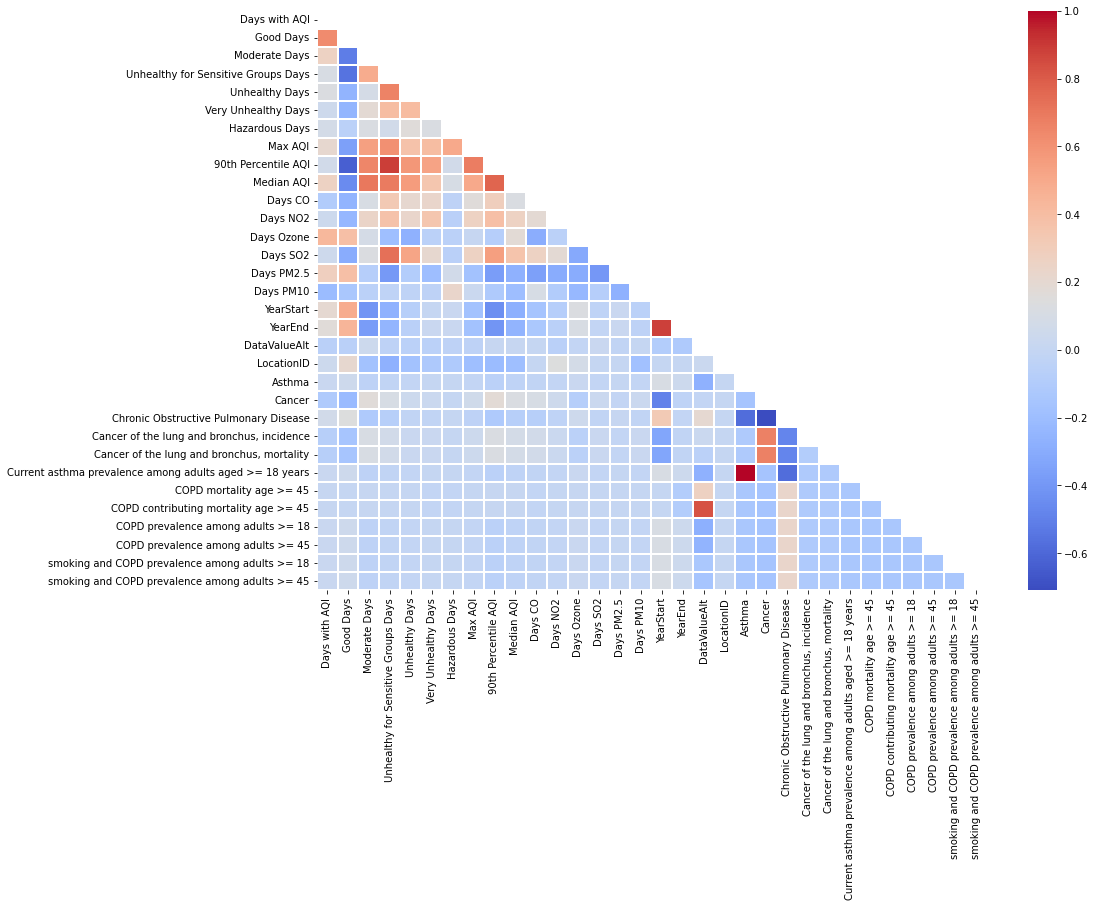

In [188]:
corrmat = merged_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# plot
f, ax = plt.subplots(figsize=(15, 10))
_ = sns.heatmap(round(corrmat,2), annot=False, mask=mask, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93);

Standardize and plot again

Throw out all but parameters that we want to compare

In [219]:
#merged_df.drop(['Days with AQI','YearStart','YearEnd', 'LocationDesc', 'DataValueAlt', 'LocationID'], axis=1, inplace=True)
merged_df.drop(['Days with AQI','YearStart','YearEnd', 'LocationDesc', 'LocationID'], axis=1, inplace=True)

merged_df

,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,...,Chronic Obstructive Pulmonary Disease,"Cancer of the lung and bronchus, incidence","Cancer of the lung and bronchus, mortality",Current asthma prevalence among adults aged >= 18 years,COPD mortality age >= 45,COPD contributing mortality age >= 45,COPD prevalence among adults >= 18,COPD prevalence among adults >= 45,smoking and COPD prevalence among adults >= 18,smoking and COPD prevalence among adults >= 45
0,161.200000,83.400000,34.800000,6.400000,1.600000,0.000000,181.000000,112.800000,45.000000,47.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,169.000000,79.166667,38.166667,11.166667,2.333333,0.000000,180.000000,115.000000,50.833333,12.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,173.166667,77.833333,28.000000,5.833333,0.666667,0.000000,181.000000,103.833333,44.833333,13.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,151.400000,68.800000,28.200000,6.400000,1.800000,0.000000,197.400000,100.600000,43.000000,26.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,193.000000,73.750000,27.250000,5.500000,0.250000,0.000000,169.000000,95.250000,38.250000,43.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5627,295.277778,44.944444,2.888889,0.833333,0.055556,0.055556,196.666667,52.000000,35.555556,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5628,295.277778,44.944444,2.888889,0.833333,0.055556,0.055556,196.666667,52.000000,35.555556,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5629,295.277778,44.944444,2.888889,0.833333,0.055556,0.055556,196.666667,52.000000,35.555556,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5630,295.277778,44.944444,2.888889,0.833333,0.055556,0.055556,196.666667,52.000000,35.555556,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


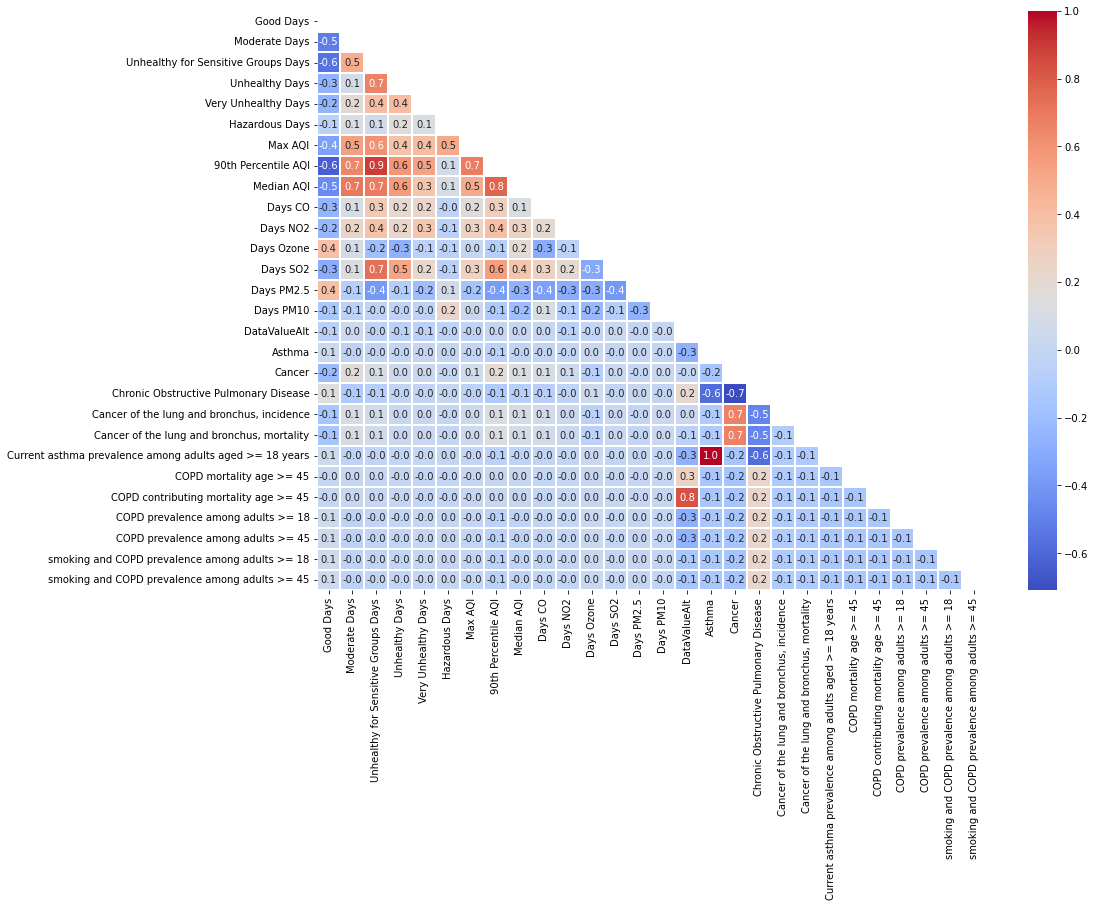

In [221]:
corrmat = merged_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# plot
f, ax = plt.subplots(figsize=(15, 10))
_ = sns.heatmap(round(corrmat,2), annot=True, mask=mask, ax=ax, cmap="coolwarm",fmt='.1f', linewidths=.05)
f.subplots_adjust(top=0.93);

In [189]:
# all but LocationDesc
# foo = merged_df.columns.tolist()
# index = foo.index('LocationDesc')
# foo.pop(index)
# foo
foo = merged_df.columns
index = foo.get_loc('LocationDesc')
foo = foo.delete(index)
foo

Index(['Days with AQI', 'Good Days', 'Moderate Days',
       'Unhealthy for Sensitive Groups Days', 'Unhealthy Days',
       'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10', 'YearStart',
       'YearEnd', 'DataValueAlt', 'LocationID', 'Asthma', 'Cancer',
       'Chronic Obstructive Pulmonary Disease',
       'Cancer of the lung and bronchus, incidence',
       'Cancer of the lung and bronchus, mortality',
       'Current asthma prevalence among adults aged >= 18 years',
       'COPD mortality age >= 45', 'COPD contributing mortality age >= 45',
       'COPD prevalence among adults >= 18',
       'COPD prevalence among adults >= 45',
       'smoking and COPD prevalence among adults >= 18',
       'smoking and COPD prevalence among adults >= 45'],
      dtype='object')

In [190]:
merged_df = merged_df[foo]

In [222]:
from sklearn.pipeline import Pipeline
from sklearn import impute
from sklearn import preprocessing

num_pipeline = Pipeline([
    ('imputer', impute.SimpleImputer(strategy='median')),
    #('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', preprocessing.StandardScaler())
])
#cdi_df_standard = num_pipeline.fit_transform(cdi_df)
merged_df[merged_df.columns] = num_pipeline.fit_transform(merged_df)
#merged_df[foo] = num_pipeline.fit_transform(foo)

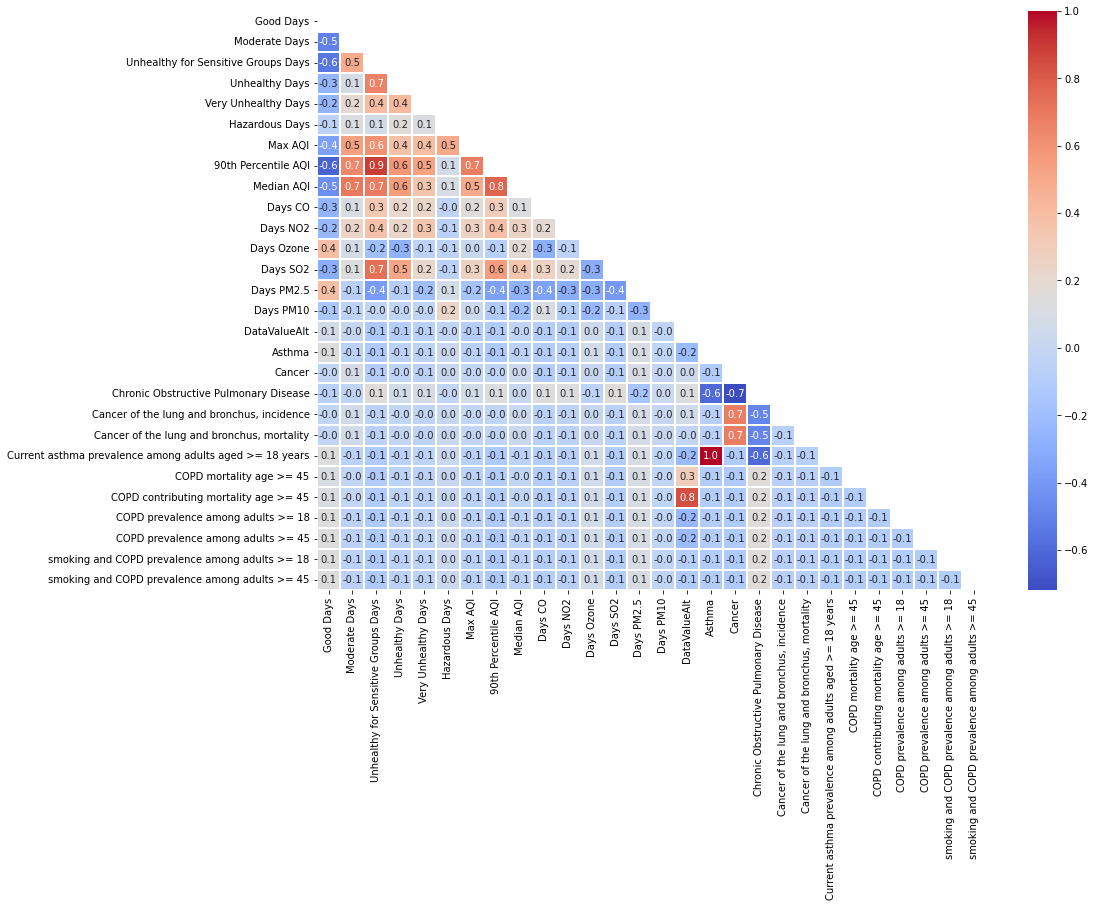

In [223]:
corrmat = merged_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# plot
f, ax = plt.subplots(figsize=(15, 10))
_ = sns.heatmap(round(corrmat,2), annot=True, mask=mask, ax=ax, cmap="coolwarm",fmt='.1f', linewidths=.05)
f.subplots_adjust(top=0.93);

Impute cancer values from four year range to yearly and plot correlation matrix

In [ ]:
years = cdi_df[cdi_df['Topic'] == 'Cancer']['YearStart'].unique()
np.sort(years)

In [ ]:
years = cdi_df[cdi_df['Topic'] == 'Asthma']['YearStart'].unique()
np.sort(years)

In [ ]:
years = cdi_df[cdi_df['Topic'] == 'Chronic Obstructive Pulmonary Disease']['YearStart'].unique()
np.sort(years)

In [ ]:
cali = aqi_df[aqi_df['State'] == 'California']

In [ ]:
# melt to give us County vs Median AQI, Days Ozone
temp = pd.melt(cali[['County', 'Median AQI', 'Days Ozone']],
                        id_vars='County', 
                        var_name='Measures', 
                        value_vars=['Median AQI', 'Days Ozone'],
                        value_name='Target')

plt.subplots(figsize=(15, 8))
sns.boxplot(x='County', y='Target', hue='Measures', data=temp.sort_values('County'))
plt.xticks(rotation='vertical')
plt.ylabel('Values')
plt.xlabel('County')
plt.title('Median AQI vs Ozone')
plt.legend(loc='upper right');

Median AQI nearly always lags behind the median Ozone value. Beyond that, its difficult to see any linear relationship here (perhaps because of CO measure variance). Still, this merits further exploration in the EDA stage.

In [ ]:
# melt to give us County vs Median AQI, Days CO
temp = pd.melt(cali[['County', 'Median AQI', 'Days CO']],
                        id_vars='County', 
                        var_name='Measures', 
                        value_vars=['Median AQI', 'Days CO'],
                        value_name='Target')

plt.subplots(figsize=(15, 8))
sns.boxplot(x='County', y='Target', hue='Measures', data=temp.sort_values('County'))
plt.xticks(rotation='vertical')
plt.ylabel('Values')
plt.xlabel('County')
plt.title('Median AQI vs CO')
plt.legend(loc='upper right');

The median AQI always exceeds the median of the CO values. There does _seem_ to be a linear relationship here.

In [ ]:
# melt to give us County vs Median AQI, Days NO2
temp = pd.melt(cali[['County', 'Median AQI', 'Days NO2']],
                        id_vars='County', 
                        var_name='Measures', 
                        value_vars=['Median AQI', 'Days NO2'],
                        value_name='Target')

plt.subplots(figsize=(15, 8))
sns.boxplot(x='County', y='Target', hue='Measures', data=temp.sort_values('County'))
plt.xticks(rotation='vertical')
plt.ylabel('Values')
plt.xlabel('County')
plt.title('Median AQI vs NO2')
plt.legend(loc='upper right');

NO2 values have high variance, but seem to either be below the median AQI or equal to it (for the most part). Correlations should be explored in EDA phase.

In [ ]:
# melt to give us County vs Median AQI, Days SO2
temp = pd.melt(cali[['County', 'Median AQI', 'Days SO2']],
                        id_vars='County', 
                        var_name='Measures', 
                        value_vars=['Median AQI', 'Days SO2'],
                        value_name='Target')

plt.subplots(figsize=(15, 8))
sns.boxplot(x='County', y='Target', hue='Measures', data=temp.sort_values('County'))
plt.xticks(rotation='vertical')
plt.ylabel('Values')
plt.xlabel('County')
plt.title('Median AQI vs SO2')
plt.legend(loc='upper right');

The median for Days SO2 always stays below the median AQI. Not a lot of variance in SO2 values, but that is likely because there are so few days of measurable SO2. I doubt that this feature will be predictive of AQI.

Lets take a look at the mean of all the values above against the AQI

In [ ]:
temp = cali[['County', 'Median AQI']].copy()
mean_measures = cali.loc[:,['Days CO', 'Days NO2', 'Days Ozone', 'Days SO2']].mean(axis=1)
temp.loc[:, 'Means'] = mean_measures

temp = pd.melt(temp[['County', 'Median AQI', 'Means']],
                        id_vars='County', 
                        var_name='Measures', 
                        value_vars=['Median AQI', 'Means'],
                        value_name='Target')

plt.subplots(figsize=(15, 8))
sns.boxplot(x='County', y='Target', hue='Measures', data=temp.sort_values('County'))
plt.xticks(rotation='vertical')
plt.ylabel('Average Values')
plt.xlabel('County')
plt.title('Median AQI vs Average Measures')
plt.legend(loc='upper right');

In [ ]:
# melt to give us County vs Median AQI, Days SO2
temp = pd.melt(cali[['County', 'Median AQI', 'Days SO2']],
                        id_vars='County', 
                        var_name='Measures', 
                        value_vars=['Median AQI', 'Days SO2'],
                        value_name='Target')

plt.subplots(figsize=(15, 8))
sns.boxplot(x='County', y='Target', hue='Measures', data=temp.sort_values('County'))
plt.xticks(rotation='vertical')
plt.ylabel('Values')
plt.xlabel('County')
plt.title('Median AQI vs SO2')
plt.legend(loc='upper right');